In [1]:
import os
import pandas as pd
import matplotlib
from datetime import datetime
from IPython.display import display, Markdown

In [2]:
covid_data_dir = '../raw_data/nyc/covid19-vaccine/'
covid_filename = 'Population Vaccinated + Doses Administered_Migrated Data.tsv'
last_dir = sorted(
    [p for p in os.listdir(covid_data_dir) 
         if os.path.isdir(os.path.join(covid_data_dir, p))]
    )[-1]

VACCINATION_DATA = os.path.join(covid_data_dir, last_dir, covid_filename)
CENSUS_DATA = '../raw_data/nyc/census/2019-NYS-population-estimates_census-gov.csv'

NYC_CENSUS_NAME = 'New York city'

DAILY = 'Daily ' # Trailing space required



In [3]:
vax_raw = pd.read_csv(VACCINATION_DATA, sep='\t', encoding = 'utf-16')


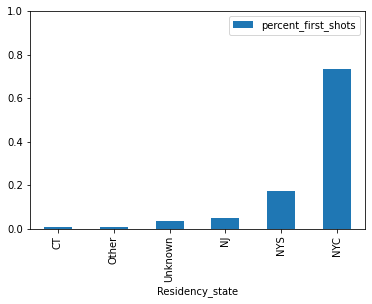

In [17]:
first_shot_col = 'N partially vaccinated'
state_col = 'Residency_state'

first_shots = vax_raw[[state_col, first_shot_col]].copy()
total = first_shots.sum()[first_shot_col]
first_shots['percent_first_shots'] = first_shots[first_shot_col] / total

first_by_loc = first_shots.groupby(state_col).sum().sort_values('percent_first_shots')
ax = first_by_loc.plot.bar(y='percent_first_shots', )
ax.set_ylim([0, 1])



In [31]:
nyc_perc = first_by_loc[first_by_loc.index == 'NYC']['percent_first_shots'].iloc[0]
nys_perc = first_by_loc[first_by_loc.index == 'NYS']['percent_first_shots'].iloc[0]

Markdown(f'### _{(nyc_perc * 100):.{1}f}%_ of vaccines go to NYC residents and _{(nyc_perc + nys_perc) * 100:.{1}f}%_ go to those who live in New York State.')


### _73.5%_ of vaccines go to NYC residents and _90.7%_ go to those who live in New York State.